In [2]:
# load data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import pickle
import ipywidgets as widgets
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse
from matplotlib import cm
cmap_hot = cm.get_cmap('hot')
cmap_viridis = cm.get_cmap('viridis')

execfile('Stimulus.py')
data_folder = "../data/"

stim_file = "Stiminfo_PVCre_2021_0012_s06_e14.csv"
stim = pd.read_csv(data_folder+stim_file)

spike_times_file = "Spiketimes_PVCre_2021_0012_s06_e14.npy"
spike_times = np.load(data_folder+spike_times_file, allow_pickle=True)
active = [len(spike_times[i]) > 0 for i in range(len(spike_times))]
spike_times = spike_times[np.where(active)]

num_unit = len(spike_times)
num_trial = len(stim)

# sort by firing rate

num_spike = list(map(len, spike_times))
# num_spike = np.array([len(spike_times[i]) for i in range(len(spike_times))])
spike_times = spike_times[np.argsort(num_spike)[::-1]]
execfile('load.py')

max_delay = 300 # dt
tau_id_range = np.arange(max_delay)

latest_spike_time = max([np.max(s) for s in spike_times if len(s)])
latest_stim_offtime = list(stim['stim_offtime'])[-1]
experiment_dur = max([latest_spike_time, latest_stim_offtime])

dt = 0.001 # 1 ms
exp_time = np.arange(0, experiment_dur, dt)
trial_length = np.mean(stim['stim_offtime']-stim['stim_ontime'])
M = len(exp_time)

# binary spike and stimulus trains
B_stim = {}
for key in key_list:
    B_stim[key] = []
    for stim_id, trials in enumerate(stim_id_trial[key]):
        B_stim[key].append([])
        s = []
        for trial_id in trials:
            t_on, t_off = stim['stim_ontime'][trial_id], stim['stim_offtime'][trial_id]
            s += list(np.arange(int(t_on//dt), int(t_off//dt)))

        B_stim[key][stim_id] = sparse.coo_matrix((np.ones(len(s)), (np.zeros(len(s), dtype=int), s)), shape=(1, M))
s = spike_times//dt
B_spike = []
for unit_id in range(num_unit):
    B_spike.append(sparse.coo_matrix((np.ones(len(s[unit_id])), (np.zeros(len(s[unit_id]), dtype=int), np.int0(s[unit_id]))), shape=(1, M)))

# histogram error bars: num spikes
s = np.zeros((num_unit, 2))
for unit_id in range(num_unit):
    # print("unit: %d"%unit_id)
    a = np.zeros(len(tau_id_range))
    for tau_id in tau_id_range:
        a[tau_id] = np.sum(B_spike[unit_id].col >= tau_id)
    
    s[unit_id] = [np.mean(a), np.std(a)]

key_symbol = {'pair':'$(\\theta,\phi)$', 'orientation':'$\\theta$', 'phase':'$\phi$'}

# 2D tuning
avg_firing_rate_pair = np.array([sts.zscore(stim_hist['pair'][unit_id]).reshape((len(tau_id_range), num_stim['orientation'], num_stim['phase'])) for unit_id in range(num_unit)])

stim_data.pkl
dict_keys(['stim_val', 'trial_stim_id', 'key_list', 'num_trial', 'trial_pair_id', 'pair_val', 'pair_trial_id', 'stim_id_trial', 'num_stim'])
spike_data.pkl
dict_keys(['spike_count_rate', 'avg_firing_rate', 'sem_firing_rate', 'firing_rate', 'stim_num_trial', 'C_r_fphi_theta', 'theta_hist', 'phase_hist', 'pair_hist'])
corr_data.pkl
dict_keys(['corr_stim_unit', 'optimal_avg_firing_rate', 'stim_hist', 'stim_hist_caution'])


## Peristimulus time histogram
we should wait for the PSTH to stabilize otherwise we get the transient sharp response to sudden change of stimulus.

In [3]:
# concatenate spike times of all trials with the same stimuli
# firing rate

In [4]:
trial_spike_times = np.ndarray((num_unit, num_trial), dtype=object)
delta_t_on = 0.2 # 200ms
delta_t_off = 0.3
for trial_id in range(num_trial):
    t_on, t_off = stim['stim_ontime'][trial_id]-delta_t_on, stim['stim_offtime'][trial_id]+delta_t_off
    for unit_id in range(num_unit):
        trial_spike_times[unit_id, trial_id] = spike_times[unit_id][np.where((spike_times[unit_id] < t_off) & (spike_times[unit_id] > t_on))]
subseq_trials = 5
subseq_spike_times = np.ndarray(num_unit, dtype=object)
for unit_id in range(num_unit):
    subseq_spike_times[unit_id] = [np.concatenate(trial_spike_times[unit_id][i:i+subseq_trials]) for i in range(num_trial-subseq_trials)]

subseq_spike_times_locked = {}
subseq_spike_times_locked['ontime'] = [subseq_spike_times[unit_id] - stim['stim_ontime'][:-subseq_trials] for unit_id in range(num_unit)]
subseq_spike_times_locked['offtime'] = [subseq_spike_times[unit_id] - stim['stim_offtime'][:-subseq_trials]  for unit_id in range(num_unit)]

/usr/lib/python3.10/site-packages/pandas/core/roperator.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return right - left


In [5]:
from scipy.stats import zscore
trial_dur = stim['stim_offtime'] - stim['stim_ontime']
z_trial_dur = zscore(trial_dur)
intertrial_dur = np.array(stim['stim_ontime'])[1:] - np.array(stim['stim_offtime'])[:-1]
z_intertrial_dur = zscore(intertrial_dur)

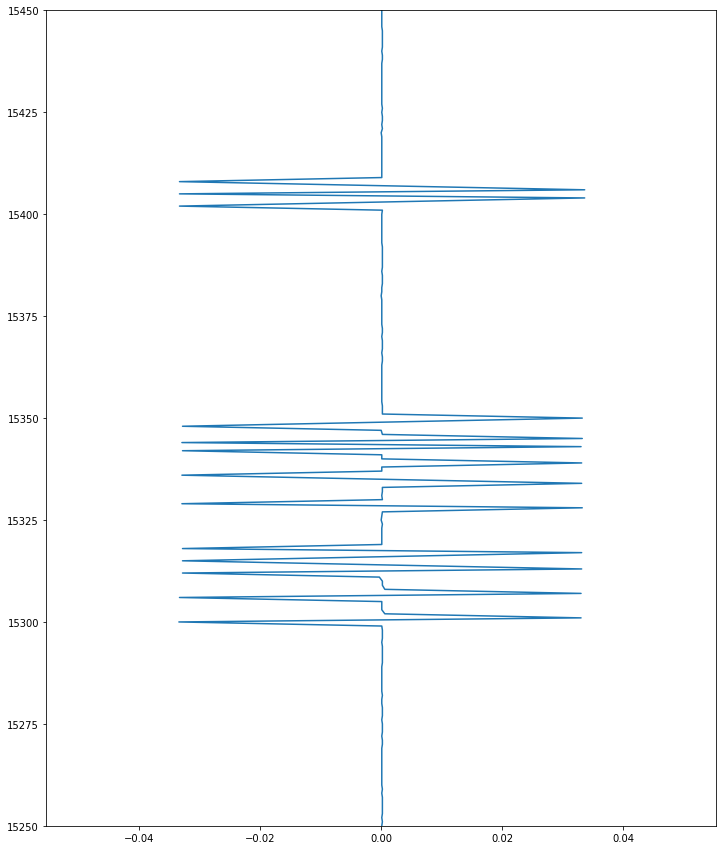

In [6]:
fig = plt.figure(figsize=(12,15))
plt.eventplot(intertrial_dur, lineoffsets=-1000, linelengths=1000, color='r')
plt.plot(intertrial_dur, np.arange(19999))
plt.ylim([15250, 15450])
plt.show()

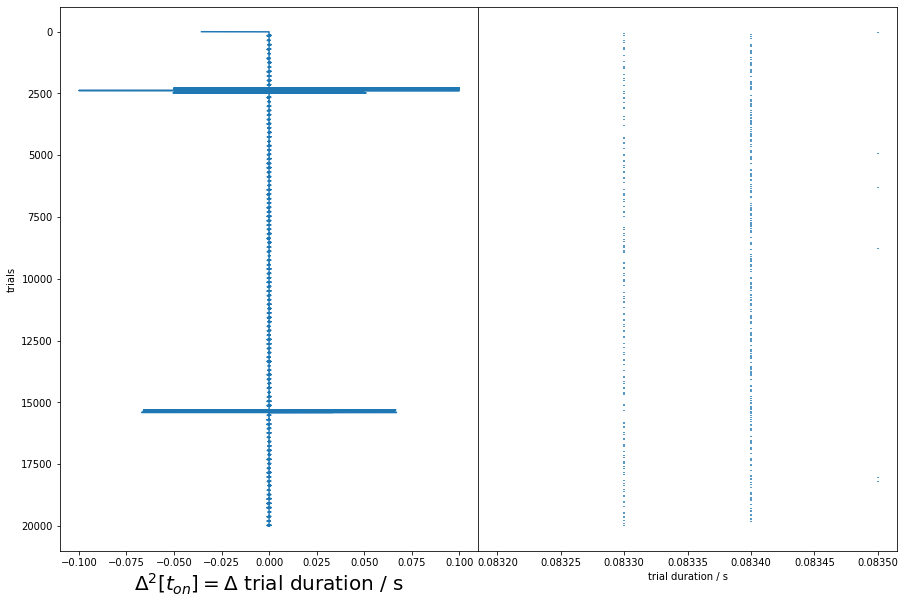

In [7]:
unit_id = 1

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].plot(np.diff(stim['stim_ontime'], n=2), np.arange(20000-2))
ax[0].invert_yaxis()
ax[0].set_xlabel('$\Delta^2[t_{on}]=\Delta$ trial duration / s', size=20)
ax[0].set(ylabel='trials')
ax[1].eventplot([[trial_dur[i]] for i in range(num_trial)], lineoffsets=1, linelengths=0.8)
ax[1].set(yticks=[], xlabel='trial duration / s')
ax[1].invert_yaxis()
# ax[2].eventplot([[stim['stim_ontime'][i] - stim['stim_offtime'][i]] for i in range(num_trial)], lineoffsets=1, linelengths=0.8)
# ax[2].set(title='unit %d'%unit_id, yticks=[], xlabel='t/s (locked to trial onsets)')
# ax[2].invert_yaxis()
plt.subplots_adjust(wspace=0)
plt.show()

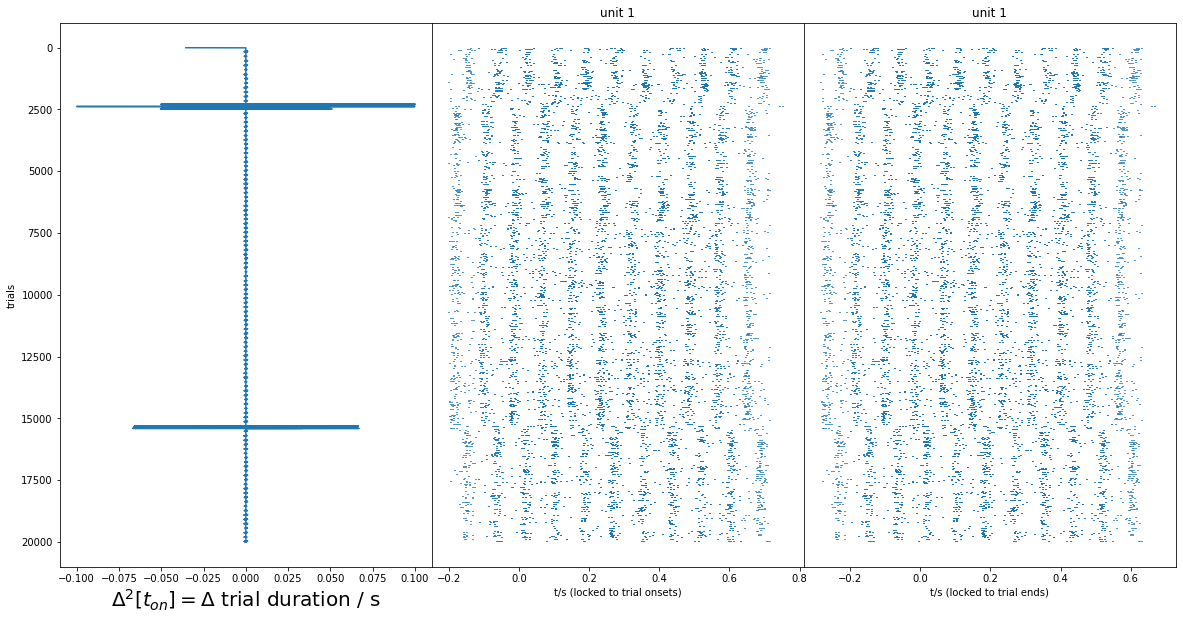

In [8]:
unit_id = 1

fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].plot(np.diff(stim['stim_ontime'], n=2), np.arange(20000-2))
ax[0].invert_yaxis()
ax[0].set_xlabel('$\Delta^2[t_{on}]=\Delta$ trial duration / s', size=20)
ax[0].set(ylabel='trials')
ax[1].eventplot(subseq_spike_times_locked['ontime'][unit_id], lineoffsets=1, linelengths=0.8)
ax[1].set(title='unit %d'%unit_id, yticks=[], xlabel='t/s (locked to trial onsets)')
ax[1].invert_yaxis()
ax[2].eventplot(subseq_spike_times_locked['offtime'][unit_id], lineoffsets=1, linelengths=0.8)
ax[2].set(title='unit %d'%unit_id, yticks=[], xlabel='t/s (locked to trial ends)')
ax[2].invert_yaxis()
plt.subplots_adjust(wspace=0)
plt.show()

In [9]:
trial_spike_times = np.ndarray((num_unit, num_trial), dtype=object)
delta_t_on = 0.2 # 200ms
delta_t_off = 0.3
for trial_id in range(num_trial):
    t_on, t_off = stim['stim_ontime'][trial_id]-delta_t_on, stim['stim_offtime'][trial_id]+delta_t_off
    for unit_id in range(num_unit):
        trial_spike_times[unit_id, trial_id] = spike_times[unit_id][np.where((spike_times[unit_id] < t_off) & (spike_times[unit_id] > t_on))] - stim['stim_ontime'][trial_id]

In [10]:
dt = 0.001 # 1ms
T = delta_t_on + delta_t_off + trial_length
time_range = np.arange(0, T, dt) - delta_t_on
trial_onsets = time_range[np.where(np.diff(time_range//trial_length))]
num_bins = len(time_range)


In [11]:
PSTH = {}

for key in key_list:
    PSTH[key] = np.zeros((num_unit, num_stim[key], num_bins))
    for stim_id, trials in enumerate(stim_id_trial[key]):
        for unit_id in range(num_unit):
            cumulative_spike_times = np.concatenate(trial_spike_times[unit_id, trials])
            for t in cumulative_spike_times:
                PSTH[key][unit_id, stim_id, int((t+delta_t_on)//dt)] += 1
                # firing_rate[key][unit_id, stim_id] = np.histogram(cumulative_spike_times, dt_edges)
    
    PSTH[key] /= dt*len(trials)

In [12]:
from scipy import signal
fs = 1/dt
b, a = signal.butter(5, 50, fs=fs, btype='low')
PSTH_filt = {}
for key in key_list:
    PSTH_filt[key] = signal.filtfilt(b, a, PSTH[key], axis=-1)

In [13]:
from matplotlib import gridspec

def plot_PSTH_raster(unit_id, key, stim_list=[], raster=True, plot=False, savepath=''):

    if len(stim_list)==0:
        stim_iter = range(num_stim[key])
    
    else:
        stim_iter = stim_list

    n_row = int(len(stim_iter)//4)+1
    fig = plt.figure(figsize=(4*5, n_row*5))
    gs = gridspec.GridSpec(n_row, 4)
    for i, stim_id in enumerate(stim_iter):

        r, c = i //4, i%4

        if raster:
            gs0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[r, c], hspace=0)
            ax0 = fig.add_subplot(gs0[0, :])

            ax0.eventplot(trial_spike_times[unit_id, stim_id_trial[key][stim_id]]+delta_t_on)
            ax0.set(ylabel='trials',  title=key_symbol[key] + ' = %d'%stim_val[key][stim_id])

            ax0.invert_yaxis()


            ax1 = fig.add_subplot(gs0[1, :])
            ax1.axvspan(0, trial_length, color='g', alpha=0.1)

            for t_on in trial_onsets:
                ax1.axvline(t_on, c='k', alpha=0.5)

            ax1.plot(time_range, PSTH[key][unit_id, stim_id], alpha=0.3)
            ax1.plot(time_range, PSTH_filt[key][unit_id, stim_id], 'r', label='smoothed PSTH')
            ax1.set(xlabel='t / s')

        else:
            ax1 = fig.add_subplot(gs[r, c])
            ax1.axvspan(0, trial_length, color='g', alpha=0.1)
            for t_on in trial_onsets:
                ax1.axvline(t_on, c='k', alpha=0.5)
                
            ax1.plot(time_range, PSTH[key][unit_id, stim_id], alpha=0.3)
            ax1.plot(time_range, PSTH_filt[key][unit_id, stim_id], 'r')
            ax1.set(xlabel='t / s', title=key_symbol[key] + ' = %d'%stim_val[key][stim_id])
        

    fig.suptitle('PSTH of unit %d' % unit_id, y=1.01)
    plt.tight_layout()
    
    if plot:
        plt.show()
    
    if len(savepath)>0:
        plt.savefig(savepath, transparent=False, facecolor='white', bbox_inches='tight')
        plt.close()

In [14]:
for unit_id in range(1,2):
    print(unit_id, end='\r')
    plot_PSTH_raster(unit_id=unit_id, key='orientation', stim_list=[], raster=True, plot=False, savepath='PSTH_orientation_unit%d'%unit_id)

In [15]:
autocorr = np.convolve(B_spike[1].A[0][:100000], B_spike[1].A[0][::-1][:100000], mode='full')

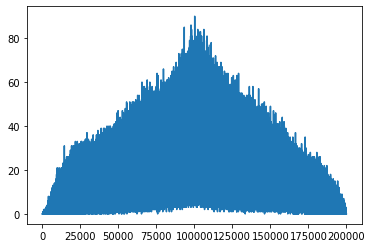

In [16]:
plt.plot(autocorr)

In [17]:
def point_fft(pt, tapers, nfft):
    """
    Compute Fourier spectra of a set of point processes given a set of tapers.
    
    Parameters
    ----------
    pt : ndarray
        2D array of point processes, columns should correspond to processes
    tapers : ndarray
        2D array of tapers, rows should correspond to different tapers
    nfft : int
        number of points to include in the FFT, if nfft is greater than the number of time points the signals
        will be zero-padded
        
    Returns
    -------
    out : ndarray
        Fourier series of each tapered point process
    """
    # allow 1D input
    if pt.ndim == 1:
        pt = pt[:, np.newaxis]
        
    assert pt.shape[0] == tapers.shape[1], "Tapers and point-processes must have same number of time points."
    
    # apply tapers to point process
    tapered_pt = np.array([pt.T * taper for taper in tapers])
    
    # compute mean event rate (repeated for each taper)
    mean_rates = np.ones((tapers.shape[0], pt.shape[-1])) * pt.mean(axis=0)
    
    # compute FT of tapers
    taper_fft = fft.fft(tapers, nfft)
    
    # compute a 'baseline' spectrum by scaling the taper FT by the mean rate
    baseline = np.array([mean_rates.T * taper for taper in taper_fft.T]).T
    
    # compute FT of tapered point process and subtract baseline  
    return fft.fft(tapered_pt, nfft) - baseline    

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import io, fft, signal
from scipy.signal import windows, detrend

def mtptcoh(pt, ct, fs=1, nperseg=None, nfft=None, noverlap=None, nw=3, ntapers=None, detrend_method='constant',
           nspike_min=4, progress_report=True):
    """
    Compute the coherence between a set of point processes and a set of continuous signals. 
    
    Parameters
    ----------
    pt : ndarray
        2D array of point processed, columns should correspond to processes (termed units)
    ct : ndarray
        2D array of continous signals, columns should correspond to channels
    fs : float (default = 1)
        sampling frequency
    nperseg : int, None (default = None)
        number of data points per segment, if None nperseg is set to 256
    nfft : int, None (default = None)
        number of points to include in scipy.fft.fft, if None nfft is set to 2 * nperseg, if nfft > nperseg data 
        will be zero-padded
    noverlap : int, None (default = None)
        amout of overlap between consecutive segments, if None noverlap is set to nperseg / 2
    nw : int (default = 3)
        time-frequency bandwidth for Slepian tapers, passed on to scipy.signal.windows.dpss
    ntapers : int, None (default = None)
        number of tapers, passed on to scipy.signal.windows.dpss, if None ntapers is set to nw * 2 - 1 (as 
        suggested by original authors)
    detrend_method : {'constant', 'linear'} (default = 'constant')
        method used by scipy.signal.detrend to detrend each segment
    nspike_min : int
        smallest number of discrete events (per time segment) allowed for a unit to be considered in the
        computation
        
    Returns
    -------
    f : ndarray
        frequency bins
    Sxx_pt, Sxx_ct : ndarray x 2
        'auto-spectra' of point processes and continuos signals respectively
    Sxy : ndarray
        cross-spectra between every combination of point process and continuous signal channels
    Cxy : ndarray
        coherence magnitude between every combination of point process and continuous signal channels
    phloc : ndarray
        phase locking between every combination of point process and continuous signal channels, phase locking
        index in each frequency bin can be computed by taking the angle of matrix each entry
    """
    # allow 1D inputs
    if pt.ndim == 1:
        pt = pt[:, np.newaxis]
    
    if ct.ndim == 1:
        ct = ct[:, np.newaxis]
        
    assert pt.shape[0] == ct.shape[0], "Signals must be same length."
    
    # set some default for parameters values
    if nperseg is None:
        nperseg = 256
        
    if nfft is None:
        nfft = nperseg * 2
    
    if noverlap is None:
        noverlap = nperseg / 2
        
    if ntapers is None:
        ntapers = 2 * nw - 1
        
    stepsize = nperseg - noverlap
    nsegs = int(np.floor(pt.shape[0] / stepsize))

    fftnorm = np.sqrt(2 / nfft) # value taken from original matlab function
    
    # initialize auto-spectra and cross-spectra arrays
    Sxx_pt = np.zeros((pt.shape[1], nfft), dtype='complex128')
    Sxx_ct = np.zeros((ct.shape[1], nfft), dtype='complex128')
    Sxy = np.zeros((pt.shape[1], ct.shape[1], nfft), dtype='complex128')
    phloc = np.zeros((pt.shape[1], ct.shape[1], nfft), dtype='complex128')
    
    # get FFT frequency bins
    f = fft.fftfreq(nfft, 1 / fs)
    
    # get tapers
    tapers = windows.dpss(nperseg, nw, Kmax=ntapers)

    # keep track of number of segments used for each unit 
    unit_nsegs = np.zeros(pt.shape[1]) 
    # loop over segments
    for seg_ind in range(nsegs):
        if progress_report:
            print('%d'%(100*(seg_ind+1)/nsegs)+'%', end='\r')
            
        # prepare segment
        i0 = int(seg_ind * stepsize)
        i1 = int(seg_ind * stepsize + nperseg)
        if i1 > len(pt): # stop if segment is out of range of data
            break
        seg_pt = pt[i0:i1, :]
        seg_ct = ct[i0:i1, :]
        
        # get nspikes
        nspikes = seg_pt.sum(axis=0)
        valid_units = np.where(nspikes >= nspike_min)[0]
        
        # restrict analysis for this segment to units with sufficient spikes
        seg_pt = seg_pt[:, valid_units]
        unit_nsegs[valid_units] += 1
        
        # compute FT of point process data
        pxx_pt = point_fft(seg_pt, tapers, nfft) / fftnorm
        
        # compute 'auto-spectra' of point process
        Sxx_pt[valid_units] += (pxx_pt * np.conjugate(pxx_pt)).sum(axis=0) 
       
        # detrend continuous data
        seg_ct = detrend(seg_ct, type=detrend_method, axis=0)

        # apply tapers
        tapered_seg_ct = np.array([seg_ct.T * taper for taper in tapers]) 

        # compute FFT for each channel-taper combination
        pxx_ct = fft.fft(tapered_seg_ct, nfft) / fftnorm
        
        # compute 'auto-spectra' of continuous process
        Sxx_ct += (pxx_ct * np.conjugate(pxx_ct)).sum(axis=0)
        
        # for each unit-channel combination
        for unit in range(seg_pt.shape[1]):
            for channel in range(seg_ct.shape[1]):
                # compute cross-spectra, averaging over tapers
                Sxy[unit, channel] += (pxx_pt[:, unit, :] * np.conjugate(pxx_ct[:, channel, :])).sum(axis=0)
                # take only phase values and compute PLI, averagins over tapers
                pt_phase = np.angle(pxx_pt[:, unit, :])
                ct_phase = np.angle(pxx_ct[:, channel, :])
                phloc[unit, channel] += (np.exp(1j * pt_phase) * np.conjugate(np.exp(1j * ct_phase))).sum(axis=0)  
                
    # get normalization factors to account for summing over tapers and segments
    unit_csdnorm = unit_nsegs * ntapers
    continuous_csdnorm = nsegs * ntapers
    
    # apply normalization factors (divide by zero will result in NaN)
    Sxx_pt = (Sxx_pt.T / unit_csdnorm).T
    Sxx_ct = (Sxx_ct.T / continuous_csdnorm).T
    Sxy = (Sxy.T / unit_csdnorm).T
    phloc = (phloc.T / unit_csdnorm).T
    
    # compute power normalization matrix
    powernorm = np.zeros((pt.shape[1], ct.shape[1], nfft))
    for unit in range(pt.shape[1]):
        for channel in range(ct.shape[1]):
            powernorm[unit, channel] = np.sqrt((np.abs(Sxx_pt[unit])) * (np.abs(Sxx_ct[channel]))) 
            
    # apply normalization to cross-spectra to get coherence
    Cxy = np.abs(Sxy) / powernorm
    
    return f, Sxx_pt, Sxx_ct, Sxy, Cxy, phloc

def inds2train(inds_list, n):
    """
    Convert a set of event indices (time points) into a binary time-series. It is assumed that all channels in
    the input set occur over the same period and that the indices refer to the same time base.
    
    Parameters
    ----------
    inds_list : list, dict, ndarray
        sequence containing indices (time points) at which events occur for each of a set of 
        point processes
    n : int
        total length of segment in which events occur
    
    Returns
    -------
    event_train : ndarray
        binary time-series array for each member of input set, columns correspond to channels
    """
    event_train = np.zeros((n, len(inds_list)), dtype='uint8')
    for ch in range(len(inds_list)): 
        event_train[inds_list[ch], ch] = 1
    
    return event_train

def point_fft(pt, tapers, nfft):
    """
    Compute Fourier spectra of a set of point processes given a set of tapers.
    
    Parameters
    ----------
    pt : ndarray
        2D array of point processes, columns should correspond to processes
    tapers : ndarray
        2D array of tapers, rows should correspond to different tapers
    nfft : int
        number of points to include in the FFT, if nfft is greater than the number of time points the signals
        will be zero-padded
        
    Returns
    -------
    out : ndarray
        Fourier series of each tapered point process
    """
    # allow 1D input
    if pt.ndim == 1:
        pt = pt[:, np.newaxis]
        
    assert pt.shape[0] == tapers.shape[1], "Tapers and point-processes must have same number of time points."
    
    # apply tapers to point process
    tapered_pt = np.array([pt.T * taper for taper in tapers])
    
    # compute mean event rate (repeated for each taper)
    mean_rates = np.ones((tapers.shape[0], pt.shape[-1])) * pt.mean(axis=0)
    
    # compute FT of tapers
    taper_fft = fft.fft(tapers, nfft)
    
    # compute a 'baseline' spectrum by scaling the taper FT by the mean rate
    baseline = np.array([mean_rates.T * taper for taper in taper_fft.T]).T
    
    # compute FT of tapered point process and subtract baseline  
    return fft.fft(tapered_pt, nfft) - baseline    

## Spike triggered covariance
How can we define spike triggered average/covariance for a stimulus with parameters on a circle/[klein bottle]